PostId: 2019-03-07-114649
Title:Elements of Information Theoryの九章〜

[Elements of Information Theoryの読書記録](https://karino2.github.io/2019/02/10/143600.html)

- [2章までのノート](https://karino2.github.io/2019/01/31/115955.html)
- [3章〜8章のノート](https://karino2.github.io/2019/02/10/144121.html)

という事で以下の本の9章から先を読んでいきます。

<iframe style="width:120px;height:240px;" marginwidth="0" marginheight="0" scrolling="no" frameborder="0" src="https://rcm-fe.amazon-adsystem.com/e/cm?ref=qf_sp_asin_til&t=karino203-22&m=amazon&o=9&p=8&l=as1&IS1=1&detail=1&asins=B00HLG9ISQ&bc1=ffffff&lt1=_top&fc1=333333&lc1=0066c0&bg1=ffffff&f=ifr"> </iframe>

# 9章 ガウシアンチャンネル

興味が無いがつかう事もあるかもしれない、くらいのトピック。
結果だけ眺めておく、くらいで次に進みたい。

読み終わった。9.6のフィードバック有りは全く読んでない。
9.1〜9.3は軽く各定理の意味と証明のあらすじくらいは眺めた。
周波数成分で何が決まるか、とかは真面目にやると関数解析の世界の話題やね。

9.4以降は対象としてる問題設定と結論だけ見た、くらい。

このくらいでは全然理解出来てないが、先で必要になったらそのことに気づける程度にはなったと思うので必要になったら戻る。

# 10章 Rate distortion theory

実数を適当な離散値で近似した時に、どのくらい良く表現出来てるか、というのを扱う章らしい。

へぇ、これはなかなか面白そうなので真面目に読みたい。

### 10.2 問題設定

一つのアルファベットをRビットで表現する、とする。
するとRビットでは$$2^R$$個の数が表現出来る。

それをn個並べると、場合の数としては$$2^nR$$個という事になる。
エンコーダーはアルファベットのn個のシーケンスをこのどれかにマップする、と考える。

式10.6でn文字のdistortionを個々のdistortionの和としてるが、これだと一文字ずれると壊滅的な結果になっちゃうんだが、それは指標として微妙な気がするがどうなんだろう？

定義: $$(2^nR, n)$$-rate distortion codeとは、n個のアルファベットを$$2^nR$$までの整数のどれかにマップする関数$$f_n$$と、これらのどれかの数字から元の文字列を推測するデコーダー$$g_n$$の事。

定義: distortion Dとは、

$$D= E d(X^n, g_n(f_n(X^n)))$$

の事。EはXの分布に対して取る。

rate distortion pair R, Dがachievableとは、nを無限に飛ばした時の極限で、nのdistortionがD以下に収束する事。
極限なのね。

rate dsitortion regionはachievableな(R, D)の閉包だとか。うーん、閉包とかあんま覚えてないが。

R(D)はrate distortion functionと言われて、Dが与えられた時にrate distortion regionのRの下限。
感覚的にはDを与えた時にそれを達成出来るRの下限か。

D(R)はdistortion rate functionで、Rがgivenな時のDの下限か。ややこしい。

なおこの本では主にrate distortion functionの方を使うとか。

この章ではこのrate distortion functionが、XとXハットの相互情報量の最小値に等しい（10.11）というのがメインの内容らしい。

それにしてもこの下限を実現する時の分布での相互情報量というのは、非常にW-GANっぽいな。

## 10.3 rate distortion functionの具体例

簡単な分布で計算してみよう、という節。
こういう節はありがたいね。やっていこう。

### ベルヌーイ分布

ハミングdistortionでベルヌーイ分布の時を求める。

相互情報量を変形していく訳だが、10.16は少し考えた。
Xは二値なので、結局この丸プラスで分かっている物を足しても、不確実性は変化しない（元が完全に推測出来る）ので、10.16のようになるのだな。

次に引っかかるのは10.18の以下。

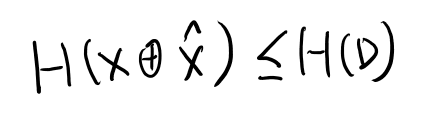

In [1]:
MeatPieImage()

そもそもDとはなんだったのかというと、associated distortionがdistortion measureの真の分布による期待値で、これの無限大での極限の最小の上限か。
うーん、この問題の場合nは1の時しか考えてないように見えるが…
良く分からないがn=1の時のassociated distortionの上限をDとしてるとしよう。

distortron measureはこの場合ハミングdistortionなので、等しければ0、異なれば1となる。これの期待値は、等しくない期待値、つまりエラー確率となる。

これで以下が言える。

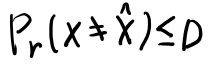

In [1]:
MeatPieImage()

さて、ここでH(D)とはなんぞや？
Dは上限なので確率変数じゃなさそう。
という事はベルヌーイ分布の時だけ定義したH(p)の定義の、pにDを入れた物か？つまり以下。

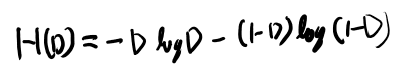

In [1]:
MeatPieImage()

うむ、そうっぽいな。さて、さきほど分からなかった10.18の以下を考える。

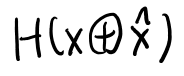

In [1]:
MeatPieImage()

このカッコの中は確率変数だよな。
するとエントロピーはそのprobability massで定義される。つまり以下か。

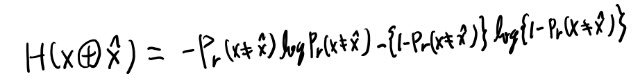

In [1]:
MeatPieImage()

H(p)は1/2以下では単調に増加するので、PrもDも1/2以下ならさきほど見たPrの不等式とH(p)の単調性からHの不等式が言えそう。

PrもDも1/2以下なのだろうか？

そもそもDは変数なので正の好きな値をとるよな。Dに対してRが決まる、という性質の物だ。

ただDが1/2よりも大きい場合というのは、Rを0に出来るので、場合分けして考えてる気がする。

一応1/2より大きい場合の補足。
pが既知のベルヌーイ分布でもっともエラーの低いXハットを考える。
少なくともいつも1-p側に全掛けしておけば、当たる確率は1/2以上だよな。
では外れるエラー確率の期待値は1/2以下か。これはRが0でも達成出来る。

だからDが1/2以下なのでは無くて、1/2以上の場合は別に答えが出るので、ここでは1/2以下の場合を考える、という事だな。

次にこのboundを達成するケースを考えてるが、これがトリッキーなので最初何を言ってるか全然分からなかった。

ここまではXを近似してXハットを出す問題だと思ってたが、ここでは単純にXという分布があった時に、それと相互情報量が特定の値のXハットを求めてるだけで、このXハットがXから出る、という事は前提としていない。
逆にXハットからXが出る。

これはエンコーダーとかデコーダーのような問題設定から離れて、相互情報量、という事だけを考えてるというのがポイントだ。
これがエンコーダーやデコーダーとどう関係してくるかはあとでわかるっぽいので、この時点では分からなくて良さそう。

この前提で考えると、なんかXハットというベルヌーイ分布があった時に、図10.3のようにXを決めれば、Xは指定された分布で、なおかつ相互情報量が下限の値となっている。

Xがあった時にどうXハットを求めるかはこの例では全然分からないが、相互情報量の下限は実際に達成出来る事はわかる。

一応10.3の相互情報量を計算しておくか。

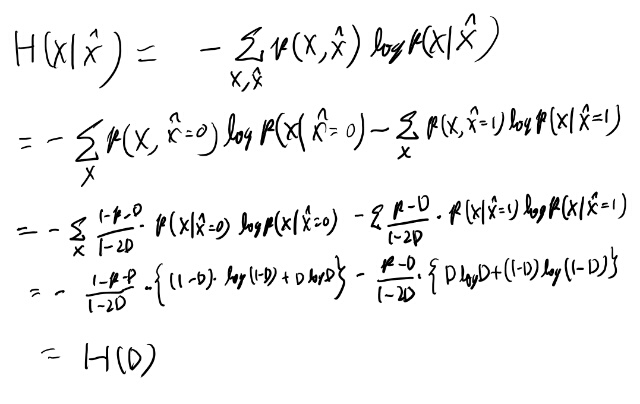

In [1]:
MeatPieImage()

まぁなってそう。

これではXからXハットを得る手段が無いので何をやってるかは全然分からない。
それが最後にunmotivatedに感じられるかもしれないが、、、と書いてある段落の意味だろう。
確かに意味が分からんが、定理10.2.1を証明すればわかるらしい。

### 10.3.2から10.4まで

10.3.2以降を読むとXからXハットを得る手段が無い事についてはより分かりやすい。
それぞれそれなりに内容はあるのだが、読むだけで理解は出来るのでメモをする必要はあまり無かった。

10.4は相互情報量で定義されたR(D)より小さいビットでは、Dよりdistortionの期待値を下げる事は出来ない、という証明。
これまたまぁまぁ重いのだが途中式が丁寧に書かれているので読むだけで分からない事は無い（結構辛かったが）

### 10.5 achievability

まずdistortion typicalという概念の定義がある。
これは以前あったjoint typicalにもうひとつ条件が加わったもの。

joint typicalはXとYがあった時、XとYがそれぞれtypicalで、なおかつp(x, y)もtypicalの不等式（つまり10.74）を満たす物、というのが定義。

そこにプラスして、distortion measureがdistortionの期待値のepsilon以内にある、という条件を足した物がdistortion typical。

### codebookの復習

codebookという単語の定義を忘れたので復習。7.27の次くらいに出てている。

メモしておこう。

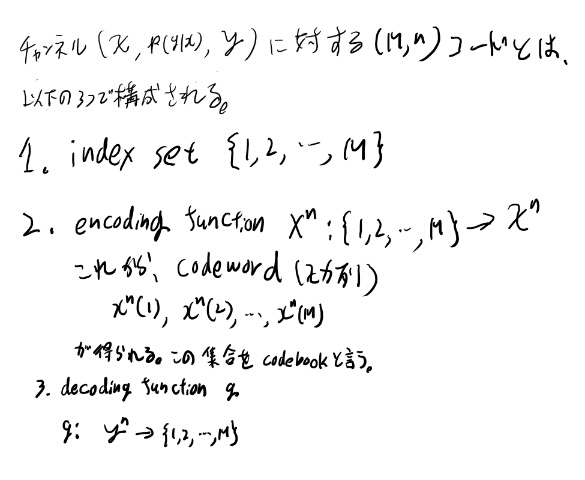

In [1]:
MeatPieImage()

つまり入力の何かの数をXというアルファベットを並べた物でエンコーディングする。
この何かの数を順番に並べた時、これに対応するcodewordをcodebookと呼ぶ。

### Acheivabilityの証明のあらすじ

ついていくのは辛いのだが理解すると別段足す事が無い感じの証明だが、何か書かないとすぐ忘れそうなのでメモを書いておく。

まずXハットのnというのが、最初に$$2^nR$$個だけnワードをサンプリングした物。
任意の長さnのシーケンスを、この最初に選んだ$$2^nR$$個の中の一番近い物に代理させて送る、というのが基本的なアイデア。

このcodebookはencoderもdecoderも持ってるとする。
このcodebookの先頭からのインデックスでどのコードワードかを表す。

するとdの期待値をdistortion typicalな奴とそうでない奴で分けると、10.90式が得られる。
感覚的にはPeは小さくなるので成り立ちそう。

これを証明するキモとなるのは、あるxnがあった時に、これがコードワードに近いのが無い確率をどう求めるか。
これを、あるxnが与えられた時に適当に長さnのコードワードをサンプリングして、これがxnのそばにある確率を求める。
これを$$2^nR$$回やっても一回も得られない確率、として求めて、あとは近似を繰り返していくとPeが小さく出来る事が示せる。

### 10.5読み終わった！

定理の証明もそのあとのChannel coding theoremの関係の話も良く書けているのだが、なかなか頭に入ってこなくて辛かったが、なんとか読み終わった！

たぶんここが、この本で読みたい話題のうち、一番むずかしい所なんじゃないか。
という事で無事乗り切った感じがある。

いやぁ、頑張った。やはりこういうのをちゃんと乗り越えていくのを積み重ねるのが大切だよなぁ。

## 10章読み終わり

後半はついていくのはきついが、ひとたび理解すれば解説の記述にはそれほどの行間が無いので特にノートはとる必要が無い、という感じで、読むだけで終わってしまった。
だから理解度もそこまででも無い。特に10.6, 10.7, 10.8は必要になったらもう一度読み直そう、という気になった。

rate distortionは非常に機械学習と近い話で、特にqを探索空間にいろいろ最適化するのはGANや変分ベイズと同じような話になる。
実際最後はEM法みたいなアルゴリズムで終わる。
そもそもに翻訳などのEncoder-Decoderなどはrate distortionの話とそっくりな形をしている。
きっとこの辺の視点からの機械学習のさまざまなアルゴリズムの理解、というのは可能なんだろうなぁ、と思った。
最近の機械学習の論文で情報理論的な扱いはたまに見かけるので、そういう論文を読んでみたいな。

# 11章 Information TheoryとStatistics

開幕からtypeという概念がいろいろ出てきて良くわからなくなりそうなのでメモをとっていく。

### typeとtype class

アルファベット$$a_i$$からサンプリングされた長さnの系列xに対し、xのtypeとは、

$$P_x(a) = \frac{N(a│x)}{n}$$

となるPxの事。これは特定のxについて定義される物で、empricalな確率という事になる。

長さnのタイプ全体の集合を$$\mathcal{P}_n$$と書く。

type classとは、
$$P \in \mathcal{P}_n$$に対し、